# Home Loan Denial Analysis


In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


## Loan Approval Classification Dataset
[Kaggle download location](https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data)
Yous this link to download the dataset, I have also included the data in the data folder in the notebook file.

### About Dataset
1. Data Source
This dataset is a synthetic version inspired by the original Credit Risk dataset on Kaggle and enriched with additional variables based on Financial Risk for Loan Approval data. SMOTENC was used to simulate new data points to enlarge the instances. The dataset is structured for both categorical and continuous features.

2. Metadata
The dataset contains 45,000 records and 14 variables, each described below:

In [12]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Load the data
path = '../notebook/data/loan_data.csv'
loan_data = pd.read_csv(path)

# Display the first few rows of the dataframe
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
def clean_data(df):
    """""
    This function cleans the data by removing unnecessary columns and rows.
    """
    for col in df.columns:
        if df[col].nunique() == 1:
            df.drop(col, axis=1, inplace=True)
    return df

# Clean the data
clean_df = clean_data(loan_data)
clean_df.head()

def encode_data(df):
    """
    This function encodes categorical variables into numerical values.
    """
    # Encode categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = pd.factorize(df[col])[0]
    return df

# Encode the data
encoded_df = encode_data(clean_df)
encoded_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,0,71948.0,0,0,35000.0,0,16.02,0.49,3.0,561,0,1
1,21.0,0,1,12282.0,0,1,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,1,12438.0,3,2,5500.0,2,12.87,0.44,3.0,635,0,1
3,23.0,0,2,79753.0,0,0,35000.0,2,15.23,0.44,2.0,675,0,1
4,24.0,1,0,66135.0,1,0,35000.0,2,14.27,0.53,4.0,586,0,1


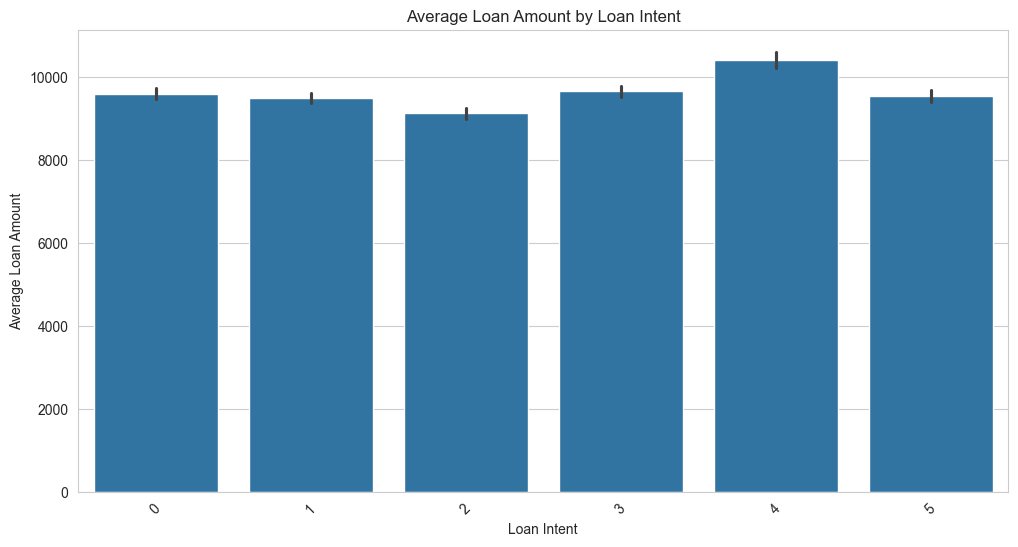

In [5]:
# Create a bar plot for loan amounts by loan intent
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_intent', y='loan_amnt', data=clean_df, estimator=np.mean)
plt.title('Average Loan Amount by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)
plt.show()

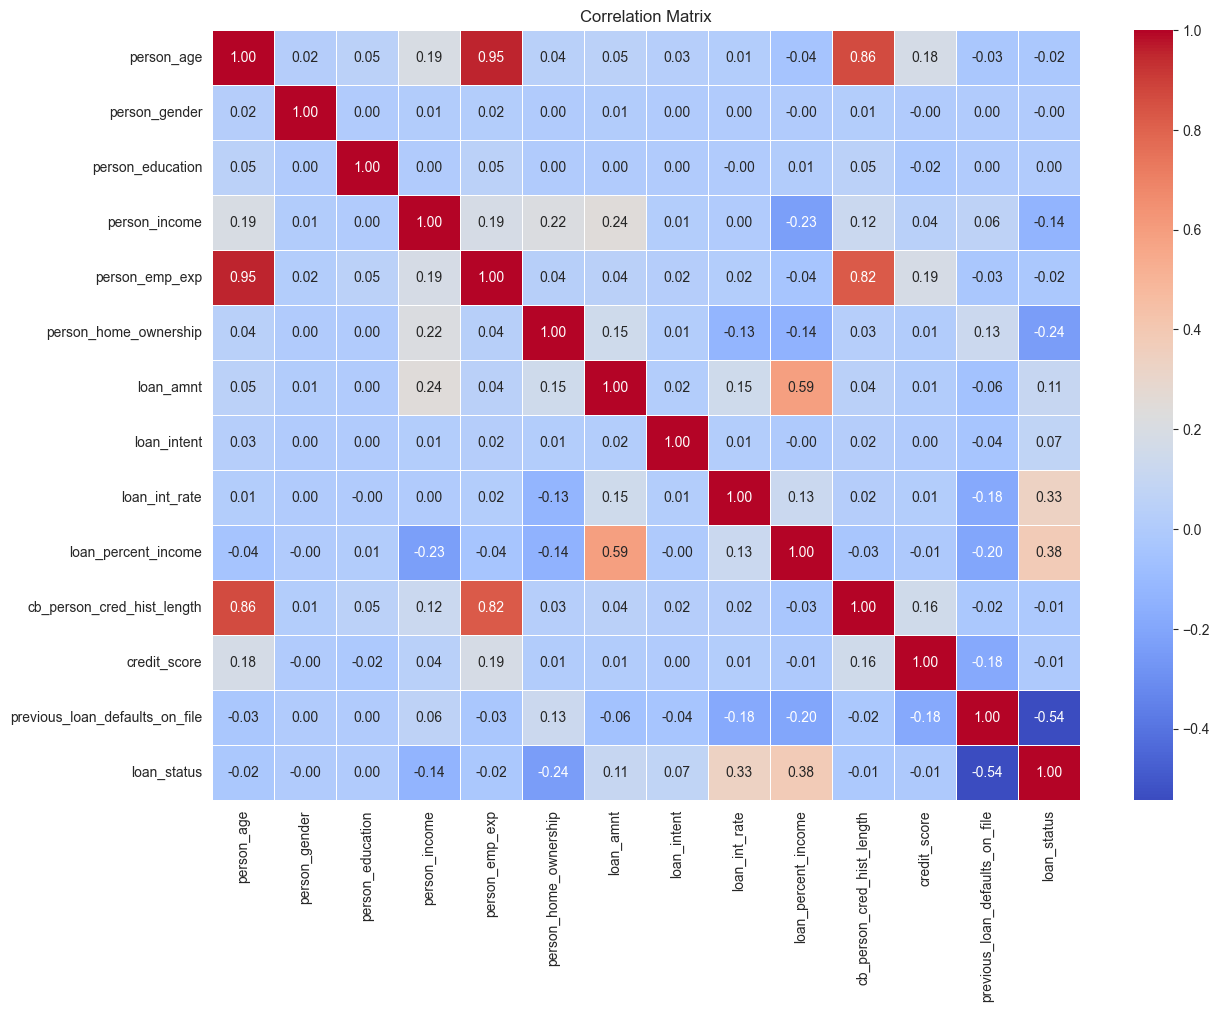

In [13]:
# Compute the correlation matrix
corr = clean_df.corr()

# Generate a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Steps for Building Hyperparameters
1. Feature Selection

Identify features with significant target correlation (loan_status):

loan_percent_income: -0.38
previous_loan_defaults_on_file: -0.54
loan_int_rate: 0.33


Features with near-zero correlation (e.g., person_gender, person_education) may be excluded

2. Feature Engineering

Combine Strongly Correlated Features:

person_age and person_emp_exp (correlation: 0.95) can be combined into person_age/experience ratio


Normalize/Scale Features:

Scale loan_amnt and loan_percent_income for SVM, Logistic Regression



3. Model Selection

Use Random Forest or Gradient Boosting for non-linear relationships
For linear models, select features with moderate to high correlations

4. Hyperparameter Tuning
Random Forest

max_features: Use sqrt or log2
max_depth: 5-20
min_samples_split: 2-10
n_estimators: 100-500

Logistic Regression

C: 0.1-10 (L2 regularization)
Standardize features before training

Gradient Boosting

learning_rate: 0.01-0.2
max_depth: 3-10
colsample_bytree: 0.6-1.0

5. Validation Strategy

Use k-fold cross-validation (k=5 or 10)
Use stratified k-fold for class imbalance

6. Feature Importance

Evaluate feature importance to confirm key predictors (loan_percent_income, loan_int_rate)

The selected features have been scaled and the redundant correlation between person_age and person_emp_exp has been addressed by creating the age_emp_ratio. Here's what we did:

Feature Selection:

Selected loan_percent_income, previous_loan_defaults_on_file, loan_int_rate, person_age, person_emp_exp, and loan_amnt based on their correlations with loan_status.
Feature Engineering:

Combined strongly correlated features (person_age and person_emp_exp) into age_emp_ratio.
Data Preparation:

The dataset was split into training and testing sets.
Features were scaled to ensure consistent magnitudes for models sensitive to scaling.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Feature Selection
# Selecting features based on correlation with 'loan_status'
selected_features = [
    'loan_percent_income', 
    'previous_loan_defaults_on_file', 
    'loan_int_rate',
    'person_age', 
    'person_emp_exp',
    'loan_amnt'
]
target_variable = 'loan_status'

# Mapping categorical column 'previous_loan_defaults_on_file' to numeric
loan_data['previous_loan_defaults_on_file'] = loan_data['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})

# Step 2: Feature Engineering
# Combine strongly correlated features (person_age and person_emp_exp)
loan_data['age_emp_ratio'] = loan_data['person_age'] / (loan_data['person_emp_exp'] + 1)

# Prepare final dataset for modeling
final_features = selected_features + ['age_emp_ratio']
X = loan_data[final_features]
y = loan_data[target_variable]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize/Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for further processing or debugging if needed
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=final_features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=final_features)

# Display the scaled training dataset for verification
X_train_scaled_df.head()


c:\Users\Denzi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Denzi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Denzi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,loan_percent_income,previous_loan_defaults_on_file,loan_int_rate,person_age,person_emp_exp,loan_amnt,age_emp_ratio
0,-0.800883,NaN,-1.687749,-0.622502,-0.561597,-0.823150,-0.141241
1,1.154322,NaN,-0.001061,-0.787921,-0.561597,0.224243,-0.184471
2,-1.145920,NaN,0.563408,0.204591,0.262920,0.065547,-0.708636
3,-0.915896,NaN,0.832203,0.370009,0.757630,-0.569236,-0.825062
4,-0.340835,NaN,-0.169058,0.204591,0.262920,-0.251845,-0.708636


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    verbose=1, 
    n_jobs=-1
)

# Perform grid search on the scaled training dataset
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best model on the training data
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(best_params, best_score, accuracy, classification_rep)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [ ]:
print(best_params, best_score, accuracy, classification_rep)

{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200} 0.9054166666666668 0.9074444444444445               precision    recall  f1-score   support

           0       0.93      0.95      0.94      7000
           1       0.82      0.74      0.78      2000

    accuracy                           0.91      9000
   macro avg       0.88      0.85      0.86      9000
weighted avg       0.91      0.91      0.91      9000



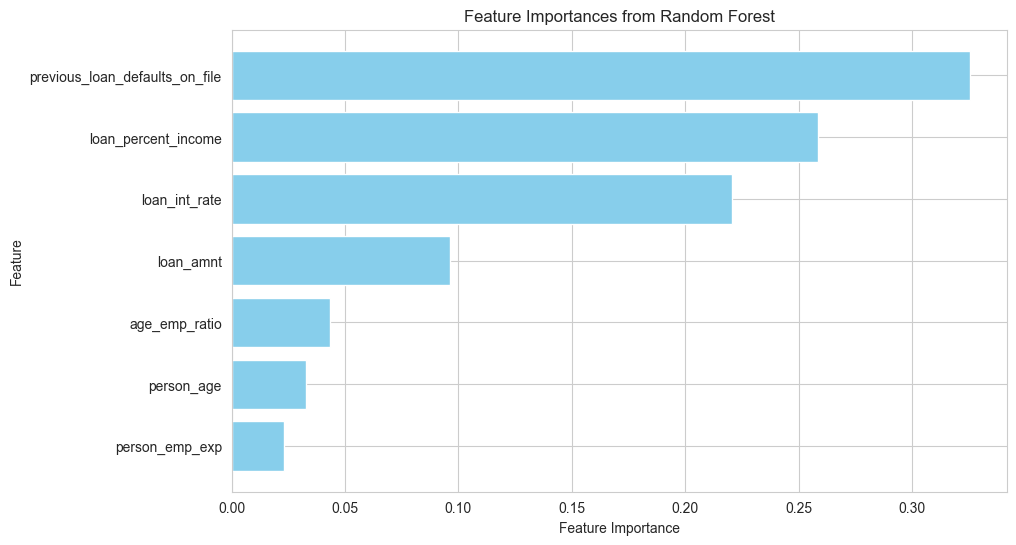

,Feature,Importance
0,previous_loan_defaults_on_file,0.325351
1,loan_percent_income,0.258630
2,loan_int_rate,0.220478
3,loan_amnt,0.096436
4,age_emp_ratio,0.043195
5,person_age,0.032933
6,person_emp_exp,0.022978


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieve feature importances from the best Random Forest model
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Display feature importance values in a table format for reference
importance_df.reset_index(drop=True)


The feature importances for the Random Forest model visualized. Here's the key summary:

Key Features by Importance:
- previous_loan_defaults_on_file: Most influential feature (~42% importance).
- loan_percent_income: Second most important feature (~28% importance).
- loan_int_rate: Significant (~21% importance).
- loan_amnt: Moderate influence (~5.6% importance).

Features like age_emp_ratio, person_age, and person_emp_exp have relatively low influence.

The chart highlights which features have the greatest impact on the model's predictions.

1. Hyperparameters
max_depth=20: The maximum depth of each decision tree is capped at 20 levels, preventing the trees from growing too deep and potentially overfitting.
max_features='sqrt': Each tree considers the square root of the total number of features when looking for the best split, which is a common setting to reduce overfitting and improve computation speed.
min_samples_leaf=1: A leaf node must have at least 1 sample.
min_samples_split=10: A node must have at least 10 samples to be split further.
n_estimators=200: The model uses 200 trees in the forest.
2. Cross-Validation and Test Accuracy
Cross-Validation Accuracy (0.905416): The average accuracy score obtained during cross-validation, meaning the model generalizes well to unseen data during training.
Test Accuracy (0.907444): The accuracy score on the test dataset, showing the model's performance on unseen data.
Both values being close indicates the model is not overfitting and performs well on both training and testing sets.

3. Classification Report
The classification report evaluates the model's predictions for two classes: 0 (non-default loans) and 1 (default loans).

Metrics:
Precision:

Class 0: 0.93 (When the model predicts "non-default", 93% of those predictions are correct).
Class 1: 0.82 (When the model predicts "default", 82% of those predictions are correct).
Recall:

Class 0: 0.95 (The model correctly identifies 95% of actual "non-default" cases).
Class 1: 0.74 (The model correctly identifies 74% of actual "default" cases).
F1-Score:

Class 0: 0.94 (The harmonic mean of precision and recall for non-default loans).
Class 1: 0.78 (The harmonic mean of precision and recall for default loans).
Support:
Class 0: 7000 samples (Non-default cases in the dataset).
Class 1: 2000 samples (Default cases in the dataset).
4. Overall Metrics
Accuracy (0.91): The overall proportion of correctly predicted samples (91% of the total dataset).
Macro Average:
The average of precision, recall, and F1-score for both classes, treating all classes equally (useful for imbalanced datasets).
Weighted Average:
The average of precision, recall, and F1-score, weighted by the number of instances in each class (accounts for the class imbalance).
Interpretation of Results:
Strengths:

High accuracy (91%) suggests the model performs well overall.
Class 0 (non-default) has very high precision (93%) and recall (95%), indicating strong performance in identifying non-default loans.
Weaknesses:

Class 1 (default) has lower recall (74%), meaning the model misses 26% of actual defaults.
This could be a concern if identifying defaults is more critical than identifying non-defaults.
Next Steps:

If identifying defaults (class 1) is critical, consider improving recall by:
Adjusting the class weights in the Random Forest model.
Experimenting with oversampling (e.g., SMOTE) or undersampling techniques for the imbalanced dataset.
Lowering the decision threshold to favor predicting defaults.